# Supervised Learning Algorithms: Simple and Multiple Linear Regression

In [1]:
# Importing necessary libraries

import numpy as np # For numerical computing, linear algebra, ...etc.
import pandas as pd # For data manipulation, like Excel
import matplotlib.pyplot as plt # For plotting and visualization
from sklearn.linear_model import LinearRegression # Sklearn is a machine learning library

## Estimating Parameters using Ordinary Least Squares and Normal Equations

### Simple Linear Regression

In [2]:
# Creating a dataframe
x = [2, 2.4, 1.5, 3.5, 3.5, 3.5, 3.5, 3.7, 3.7]
y = [196, 221, 136, 255, 244, 230, 232, 255, 267]
d = {'EngineSize':x, 'CO2emissions':y}
df = pd.DataFrame(data = d)

In [3]:
# Printing the dataframe df
df

,EngineSize,CO2emissions
0,2.0,196
1,2.4,221
2,1.5,136
3,3.5,255
4,3.5,244
5,3.5,230
6,3.5,232
7,3.7,255
8,3.7,267


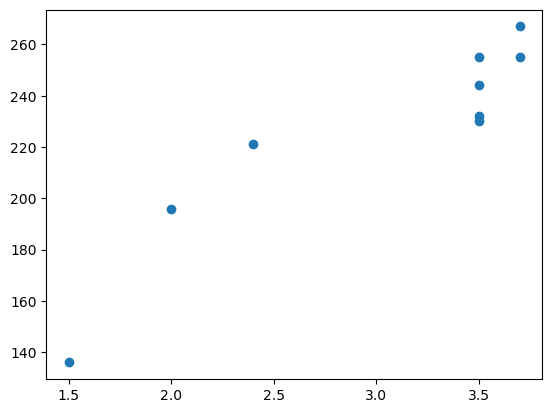

In [5]:
# Plotting the scatter plot of the dataframe "df"
plt.scatter(x = df.EngineSize, y = df.CO2emissions)

In [6]:
# Computing the mean value of X and y using mean() function in numpy (np) library
x_bar = np.mean(x)
y_bar = np.mean(y)

In [7]:
# Printing the values of x_bar and y_bar
x_bar, y_bar

(3.033333333333333, 226.22222222222223)

<b>Reminder: </b> For simple linear regression, we use one feature to predict the output,  
y = theta_0 + theta_1 * X , where theta_0 is the intercept, and theta_1 is the slope of X

In [9]:
# Computing theta_0 and theta_1 (the intercept and the slope of X)
theta_1 = np.sum( (x - x_bar) * (y - y_bar) ) / np.sum( (x - x_bar) ** 2 ) 
theta_0 = y_bar - (theta_1 * x_bar )

In [10]:
# Printing the values of theta_0 and theta_1
theta_0, theta_1

(92.80266825965751, 43.98446833930705)

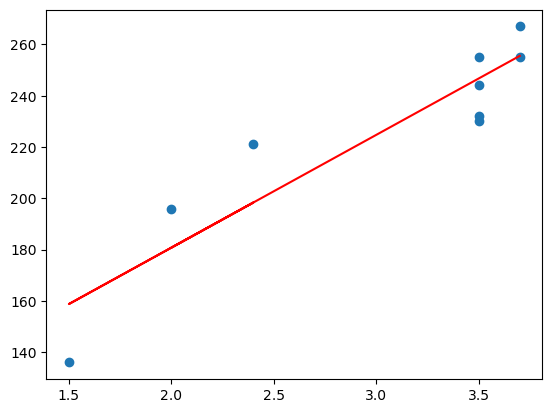

In [11]:
# Drawing the simple linear regression line

X =  df.EngineSize # X is the input feature (simple linear regression = one input)
y_my_model = theta_0 + theta_1 * X # is the developed simple linear model

plt.scatter(x = df.EngineSize, y = df.CO2emissions) # Scattering the data points in the dataframe (df)
plt.plot(X, y_my_model, color  = "red") # Plotting the developed linear model y_my_model

In [12]:
# Let's compare your results with scikit-learn

LR_model = LinearRegression() # Initializing an instance of the LinearRegression class from the sklearn library

In [19]:
# this method fits the input X to the output y, in other words it computes the parameters theta_0 and theta_1
LR_model.fit(X = df[["EngineSize"]], y = df.CO2emissions) 

LinearRegression()

In [20]:
# Remember your thetas!
theta_0, theta_1

(92.80266825965751, 43.98446833930705)

In [21]:
# Printing the thetas computed using sklearn LinearRegression
LR_model.intercept_, LR_model.coef_

(92.80266825965754, array([43.98446834]))

See, they are the same values!!! But, wht??
Because, sklearn LinearRegression uses the same approach "Least Squares and Normal Equations"!

### Multiple Linear Regression

<b>Reminder:</b> For multiple linear regression, there is more than one input feature (2 or more) to predict the output

In [22]:
# Creating a dataframe

x1 = [2, 2.4, 1.5, 3.5, 3.5, 3.5, 3.5, 3.7, 3.7]
x2 = [4, 4, 4, 6, 6, 6, 6, 6, 6]
x3 = [8.5, 9.6, 5.9, 11.1, 10.6, 10.0, 10.1, 11.1, 11.6]
y = [196, 221, 136, 255, 244, 230, 232, 255, 267]
d = {'EngineSize':x1, 'Cylinders':x2, 'FuelConsumptionComb':x3, 'CO2emissions':y}
df = pd.DataFrame(data = d)

In [23]:
# Printing the dataframe df
df

,EngineSize,Cylinders,FuelConsumptionComb,CO2emissions
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244
5,3.5,6,10.0,230
6,3.5,6,10.1,232
7,3.7,6,11.1,255
8,3.7,6,11.6,267


In [24]:
## TO-DO Task: Compute the coefficients (theta_0, theta_1, theta_2, and theta_3) using Least Squares and Normal Equations
## Note: 
# theat_0 is the intercept, 
# theta_1, theta_2, and theta_3 are the slopes of EngineSize, Cylinders, and FuelConsumptionComb

## Estimating Parameters using Gradient Descent Optimization Algorithm

In [26]:
# Importing a dataset using pandas' read_csv method
df2 = pd.read_csv("./datasets/random_linear_data.csv")

In [28]:
# Printing the dataframe df2
df2

,X,y
0,32.502345,31.707006
1,53.426804,68.777596
2,61.530358,62.562382
3,47.475640,71.546632
4,59.813208,87.230925
...,...,...
95,50.030174,81.536991
96,49.239765,72.111832
97,50.039576,85.232007
98,48.149859,66.224958


In [29]:
# Defining the features X and the output y
X = df2.X
y = df2.y

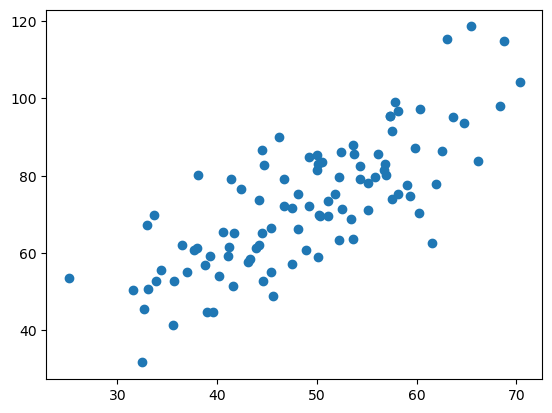

In [30]:
# Scattering the data points in the dataframe
plt.scatter(df2.X, df2.y)

In [31]:
# Gradient Descent Optimizer
'''
    X: the input
    y: the output
    learning_rate: The size of the step, it determines how fast or slow we will move towards the optimal parameters/weights.
    nbr_iterations: How many times/iterations repeating the optimization script
'''
def gradient_descent(X, y, learning_rate, nbr_iterations):
    
    # Initializing the parameters randomly or by setting the values to 0
    theta_0 = 0
    theta_1 = 0
    
    # n contains the total number of items/data points in the df2
    n = len(df2)
    
    # Repeat for nbr_iterations (updating the parameters/weights/coefficients theta_0 and theta_1)
    for i in range(nbr_iterations):
        
        # y_predictions
        y_predictions = theta_0 + theta_1 * df2.X
        
        # Gradient/Partial derivative of the loss function MSE with respect to theta_0
        d_theta_0 =  (2/n) * sum(y_predictions - df2.y)
        # Gradient/Partial derivative of the loss function MSE with respect to theta_1
        d_theta_1 = (2/n) * sum( ( y_predictions - df2.y) * df2.X )
        
        # Updating the coefficients theta_0 and theta_1
        theta_0 = theta_0 - learning_rate * d_theta_0
        theta_1 = theta_1 - learning_rate * d_theta_1
        
    return theta_0, theta_1

In [41]:
# Computing the thetas theta_0 and theta_1 using gradient descent optimization algorithm
theta_0, theta_1 = gradient_descent(df2.X, df2.y, 0.0001, 500000)

In [42]:
print("theta_0 = ",theta_0 , "\ntheta_1 = ",theta_1)

theta_0 =  7.808193346466124 
theta_1 =  1.326024444231642


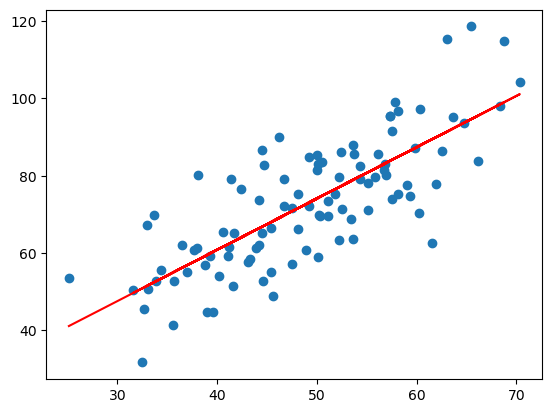

In [47]:
# Drawing the simple linear regression line

y_my_model_GD = theta_0 + theta_1 * X # is the developed simple linear model

plt.scatter(x = df2.X, y = df2.y) # Scattering the data points in the dataframe (df)
plt.plot(X, y_my_model_GD, color  = "red") # Plotting the developed linear model y_my_model

In [45]:
# Let's compare your results with scikit-learn
# Remember: Sklearn LinearRegression use least squares and normal equations,

LR_model = LinearRegression()
LR_model.fit(df2[['X']], df2.y)

LinearRegression()

In [48]:
# Remember the gradient descent results!
print("theta_0 = ",theta_0 , "\ntheta_1 = ",theta_1)

theta_0 =  7.808193346466124 
theta_1 =  1.326024444231642


In [49]:
LR_model.intercept_, LR_model.coef_

(7.991020982270399, array([1.32243102]))

See! almost the same values!

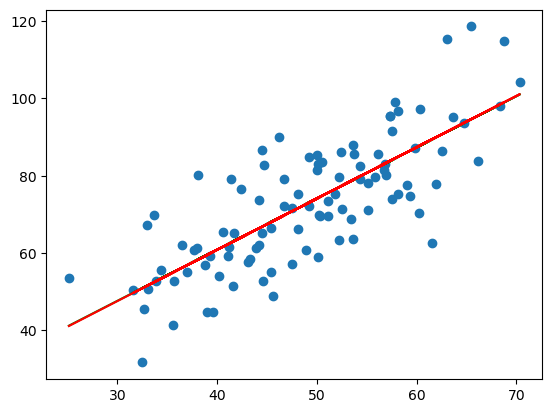

In [51]:
# Let's plot the developed linear models using Gradient Descent vs. sklearn.linear_model.LinearRegression

# sklearn.linear_model.LinearRegression
y_pred_sklearn = df2.X * LR_model.coef_[0] + LR_model.intercept_

# Our linear model using Gradient Descent
y_pred_grad_desc = df2.X * theta_1 + theta_0

# Scattering the data points in the dataframe df2
plt.scatter(df2.X, df2.y)
# Plotting the sklearn LinearRegression model
plt.plot(df2.X, y_pred_sklearn, color = 'green')
# Plotting our model (Gradient Descent)
plt.plot(df2.X, y_pred_grad_desc, color = 'red')

plt.show()